In [0]:
import pandas as pd

In [0]:
accident = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CMPE255/ACCIDENT.csv')

In [12]:
columns = accident.columns
columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [0]:
dropColumn = ['ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS', 'PERNOTMVIT', 'PERMVIT', 'COUNTY', 
              'CITY', 'FUNC_SYS', 'LATITUDE', 'LATITUDE', 'LONGITUD','RD_OWNER', 'ROUTE', 'HARM_EV','NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 
              'ARR_MIN', 'HOSP_HR', 'SP_JUR', 'TWAY_ID2', 'HOSP_MN', 'WEATHER2', 'NHS', 'RELJCT1', 'RELJCT2',
              'RAIL', 'WEATHER1', 'MILEPT', 'REL_ROAD']
acc = accident.drop(dropColumn, axis =1)

In [75]:
acc.columns

Index(['STATE', 'PERSONS', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'HOUR',
       'MINUTE', 'RUR_URB', 'TWAY_ID', 'MAN_COLL', 'TYP_INT', 'WRK_ZONE',
       'LGT_COND', 'WEATHER', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

## Plot the behavior of fatal accidents over 2018



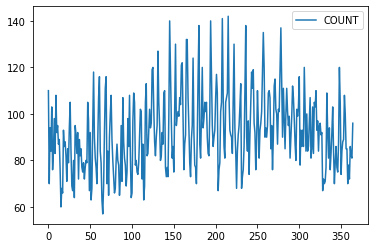

In [110]:
dateAcc = acc.groupby(['MONTH','DAY'])['STATE'].count().reset_index()
dateAcc = dateAcc.rename(columns={'STATE':'COUNT'})
dateAcc['MONTH'] = dateAcc['MONTH'].astype(str)
dateAcc['DAY'] = dateAcc['DAY'].astype(str)
dateAcc['Date'] = dateAcc['MONTH'] + '/' + dateAcc['DAY']
dateAcc.drop(['MONTH','DAY'], axis = 1, inplace=True)

dateAcc.plot.line()

In [82]:
dateAcc['COUNT'].mean()

92.2027397260274

In [84]:
dateAcc[dateAcc['Date'] == '12/25']

,COUNT,Date
358,70,12/25


In [86]:
dateAcc[dateAcc['Date'] == '1/1']

,COUNT,Date
0,110,1/1


In [88]:
dateAcc[dateAcc['Date'] == '7/4']

,COUNT,Date
184,120,7/4


In [93]:
dateAcc[dateAcc['Date'] == '3/17']

,COUNT,Date
75,108,3/17


## Bar Graph of fatal Accidents that occur on day of the week. 

#### 1 = Sunday ... 7 = Saturday

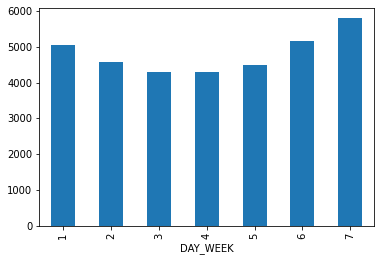

In [108]:
dayOfWeekAcc = acc.groupby(['DAY_WEEK'])['STATE'].count().rename({'STATE':'COUNT'})
dayOfWeekAcc
dayOfWeekAcc.plot.bar()